# Measure

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv("files/200107_patterned_data_norm.csv", index_col=0)

In [3]:
bic = pd.DataFrame(columns=['n', 'bic', 'run'])
ix = 0

n_components_range = range(15, 26)

In [4]:
for n_components in n_components_range:
    for i in range(3):
        gmm = GaussianMixture(n_components=n_components, covariance_type="full", max_iter=200, n_init=1)
        fitted = gmm.fit(data)
        bicnum = gmm.bic(data)
        bic.loc[ix] = [n_components, bicnum, i]
        ix += 1

        print(n_components, i, "BIC:", bicnum)

15 0 BIC: 20898564.08564277
15 1 BIC: 21229826.607374817
15 2 BIC: 20885220.44941938
16 0 BIC: 20734456.013203166
16 1 BIC: 21358919.110795964
16 2 BIC: 21768820.21532581
17 0 BIC: 20783322.25377442
17 1 BIC: 20541436.423892505
17 2 BIC: 20588199.148786012
18 0 BIC: 20548686.803816557
18 1 BIC: 20708405.67616231
18 2 BIC: 20851241.38586753
19 0 BIC: 20459187.498659
19 1 BIC: 20471870.286023356
19 2 BIC: 20392172.642807774
20 0 BIC: 20327443.557999976
20 1 BIC: 20330371.794116326
20 2 BIC: 20639510.564090297
21 0 BIC: 20502863.16398751
21 1 BIC: 20519812.086016823
21 2 BIC: 20514696.93286529
22 0 BIC: 20218184.97407493
22 1 BIC: 20548918.52999928
22 2 BIC: 20222724.29996641
23 0 BIC: 20637810.886296347
23 1 BIC: 20281675.02091094
23 2 BIC: 20668123.91780697
24 0 BIC: 19970899.894725237
24 1 BIC: 19742982.691761076
24 2 BIC: 20504009.53718251
25 0 BIC: 20382243.96485932
25 1 BIC: 20751890.818113673
25 2 BIC: 19977260.306669824


In [5]:
bic.to_csv('files/BIC_detail_15-25.csv')

## Analyse BIC

In [6]:
import husl
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})


colors = [(257, 71, 27)]
palette = sns.color_palette([husl.husl_to_hex(*x) for x in colors])

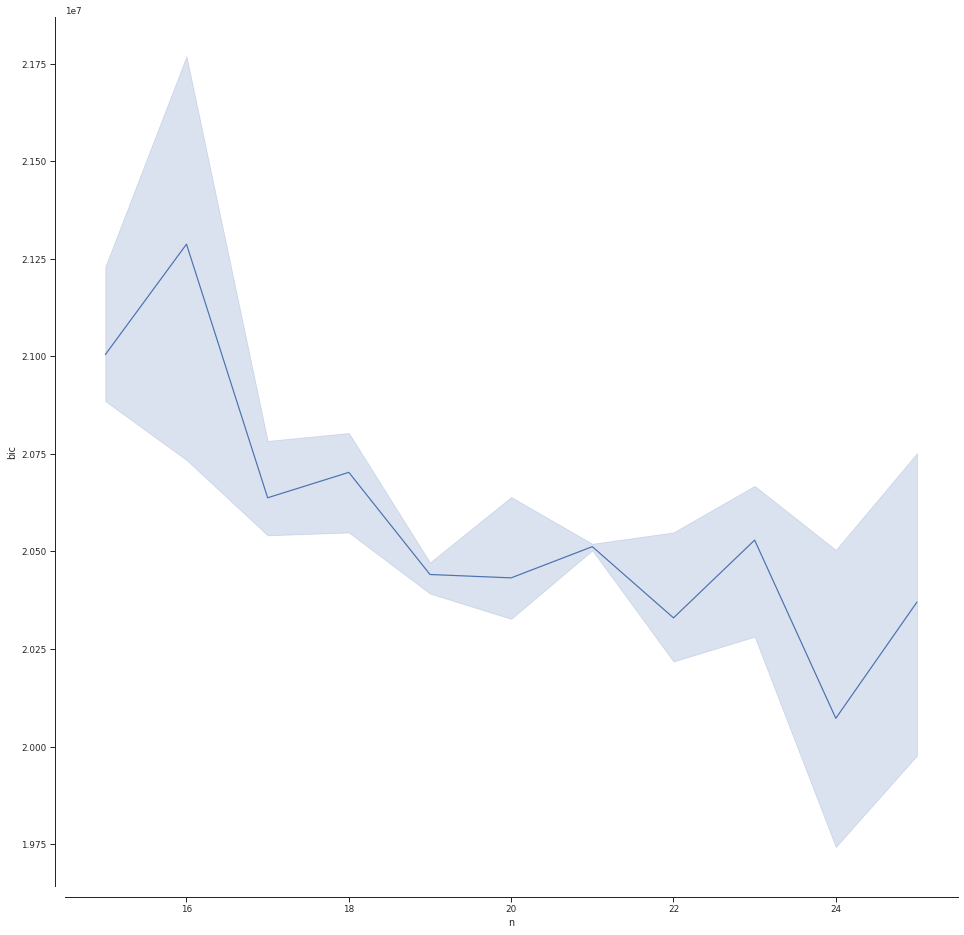

In [7]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="bic",
             data=bic, palette=palette)
sns.despine(offset=10)

## Analyse gradient

In [8]:
gradient = []
group = bic.groupby(['n']).mean()
group['gradient'] = np.gradient(group.bic)

group.reset_index(inplace=True)

In [9]:
group.to_csv('files/Gradient_detail_15-25.csv')

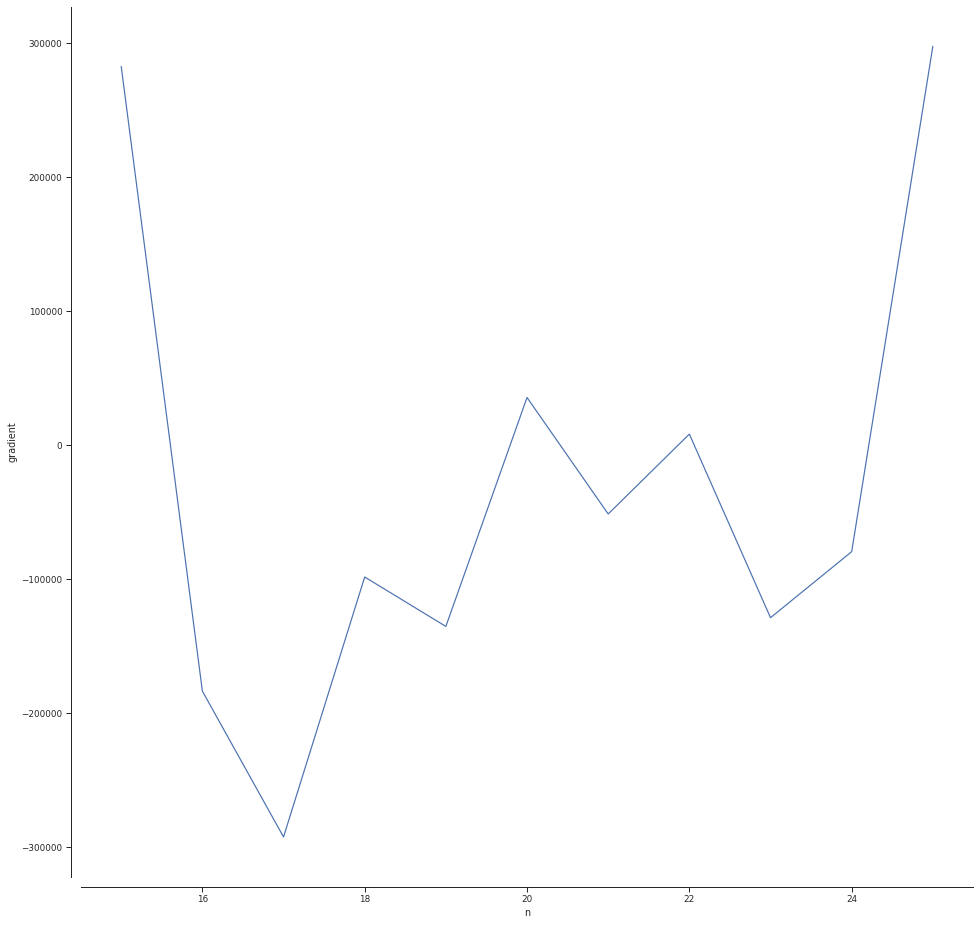

In [10]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="gradient",
             data=group, palette=palette)
sns.despine(offset=10)